In [2]:
import pandas as pd

In [5]:
file_path = 'Student_Performance_And_Attendance_Data.xlsx'

In [6]:
df_marks = pd.read_excel(file_path, sheet_name='Marks')

In [7]:
df_attendance = pd.read_excel(file_path, sheet_name='Attendance')

In [8]:
df_marks['Name'] = df_marks['Name'].str.strip().str.title()
df_attendance['Name'] = df_attendance['Name'].str.strip().str.title()

In [9]:
df_merged = pd.merge(df_marks, df_attendance, on='Name', how='inner')

In [10]:
attendance_columns = [col for col in df_attendance.columns if 'Attendance Day' in col]

In [12]:
df_merged[attendance_columns] = df_merged[attendance_columns].replace({'Y': 1, 'N': 0}).infer_objects(copy=False)

In [13]:
df_merged.fillna(0, inplace=True)

In [16]:
df_marks['Name'] = df_marks['Name'].str.strip().str.title()
df_attendance['Name'] = df_attendance['Name'].str.strip().str.title()

In [21]:
df_merged['Total Marks'] = (
    df_merged['Mini Test 1'] +
    df_merged['Mini Test 2'] +
    df_merged['Live Test'] +
    df_merged['Assignment']
)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [22]:
score_columns = ['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']
df_merged[score_columns] = df_merged[score_columns].apply(pd.to_numeric, errors='coerce')
df_merged[score_columns] = df_merged[score_columns].fillna(0)

In [23]:
df_merged['Total Marks'] = (
    df_merged['Mini Test 1'] +
    df_merged['Mini Test 2'] +
    df_merged['Live Test'] +
    df_merged['Assignment']
)

In [24]:
df_merged['Percentage Marks'] = (df_merged['Total Marks'] / 55) * 100

In [25]:
df_merged['Attendance %'] = df_merged[attendance_columns].mean(axis=1) * 100

In [26]:
df_merged['Weighted %'] = (
    df_merged['Attendance %'] * 0.40 +
    (df_merged['Mini Test 1'] / 10) * 10 * 0.10 +
    (df_merged['Mini Test 2'] / 10) * 10 * 0.10 +
    (df_merged['Live Test'] / 15) * 10 * 0.20 +
    (df_merged['Assignment'] / 20) * 10 * 0.20
)

In [29]:
def classify_performance(prf):
    if prf >= 85:
        return "Excellent"
    elif prf >= 71:
        return "Good"
    elif prf >= 50:
        return "Average"
    else:
        return "Needs Improvement"

In [30]:
df_merged['Performance Category'] = df_merged['Weighted %'].apply(classify_performance)

In [31]:
df_merged[['Name', 'Weighted %', 'Performance Category']].head()

,Name,Weighted %,Performance Category
0,Arjun,20.866667,Needs Improvement
1,Sophia Hardy,42.666667,Needs Improvement
2,Raj,46.000000,Needs Improvement
3,Emily,36.666667,Needs Improvement
4,Ishaan Saini,12.466667,Needs Improvement


In [36]:
low_attendance_high_score = df_merged[(df_merged['Attendance %'] < 75) & (df_merged['Weighted %'] > 50)]
low_attendance_high_score[['Name', 'Attendance %', 'Weighted %']]

,Name,Attendance %,Weighted %


In [34]:
top_3_students = df_merged.sort_values(by='Percentage Marks', ascending=False).head(3)

In [35]:
top_3_students[['Name', 'Percentage Marks', 'Weighted %', 'Performance Category']]

,Name,Percentage Marks,Weighted %,Performance Category
1,Sophia Hardy,270.909091,42.666667,Needs Improvement
2,Raj,100.000000,46.000000,Needs Improvement
6,Maya,100.000000,22.000000,Needs Improvement


In [37]:
attendance_cols = [col for col in df_merged.columns if 'Attendance Day' in col]
df_merged['Attendance Count'] = df_merged[attendance_cols].sum(axis=1)
correlation_data = df_merged[['Attendance Count', 'Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']]
correlation_matrix = correlation_data.corr()
correlation_matrix.loc['Attendance Count']

Attendance Count    1.000000
Mini Test 1        -0.070082
Mini Test 2        -0.020602
Live Test           0.045905
Assignment         -0.049725
Name: Attendance Count, dtype: float64

In [48]:
#Visualization
import matplotlib.pyplot as plt
print(plt.style.available)
import seaborn as sns

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [49]:
top5 = df_merged.sort_values(by='Weighted %', ascending=False).head(5)

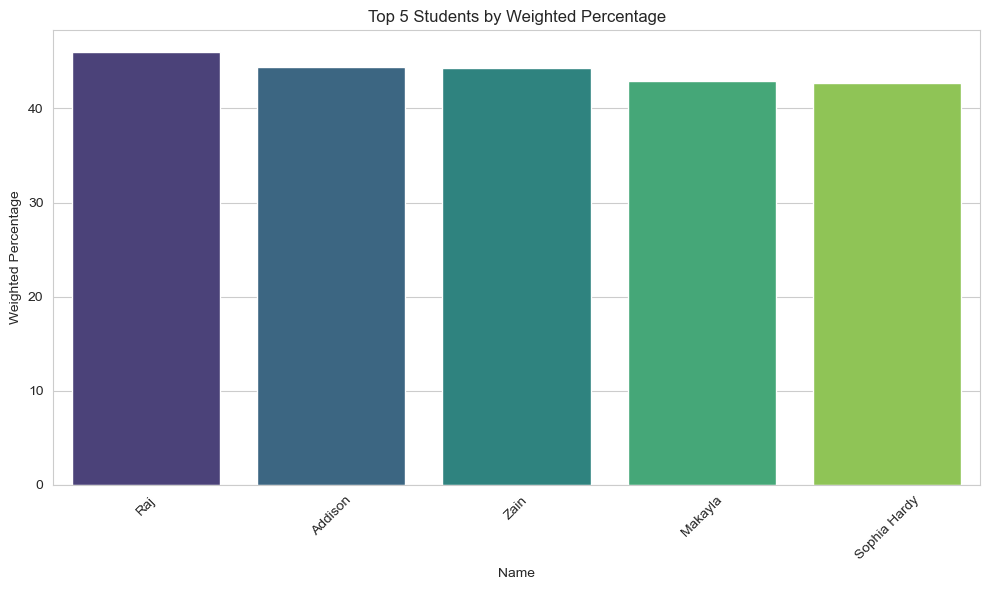

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top5, x='Name', y='Weighted %', hue='Name', palette='viridis', legend=False)
plt.title('Top 5 Students by Weighted Percentage')
plt.ylabel('Weighted Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
category_counts = df_merged['Performance Category'].value_counts()

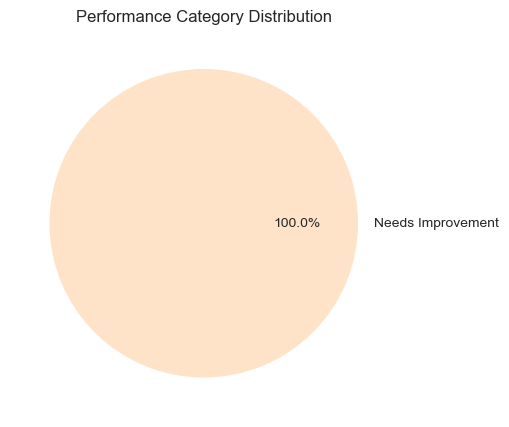

In [63]:
plt.figure(figsize=(5, 9))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=180, colors = sns.color_palette("Oranges"))
plt.title('Performance Category Distribution')
plt.show()

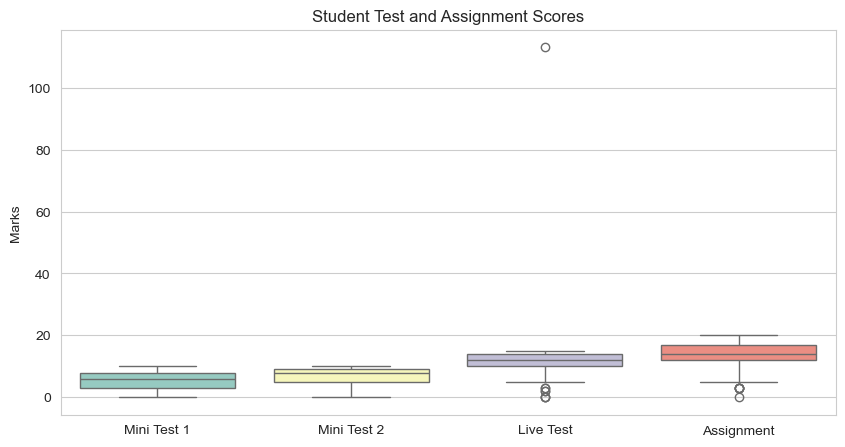

In [64]:
plt.figure(figsize=(10, 5))
score_columns = ['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']
sns.boxplot(data=df_merged[score_columns], palette='Set3')
plt.title('Student Test and Assignment Scores')
plt.ylabel('Marks')
plt.show()

In [65]:
low_attendance = df_merged[df_merged['Attendance %'] < 50]

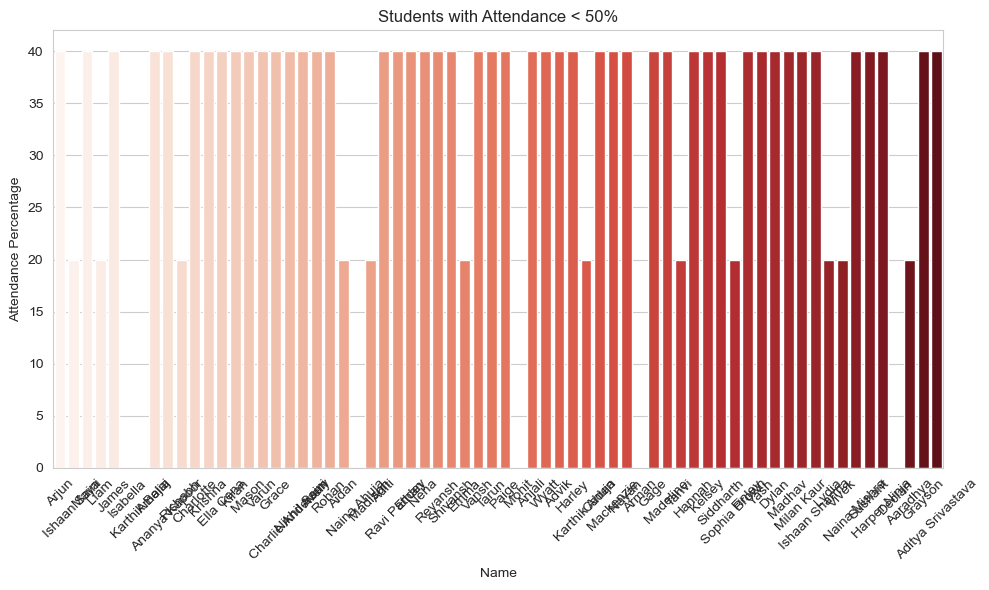

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=low_attendance, x='Name', y='Attendance %', hue='Name', palette='Reds', legend=False)
plt.title('Students with Attendance < 50%')
plt.xticks(rotation=45)
plt.ylabel('Attendance Percentage')
plt.tight_layout()
plt.show()

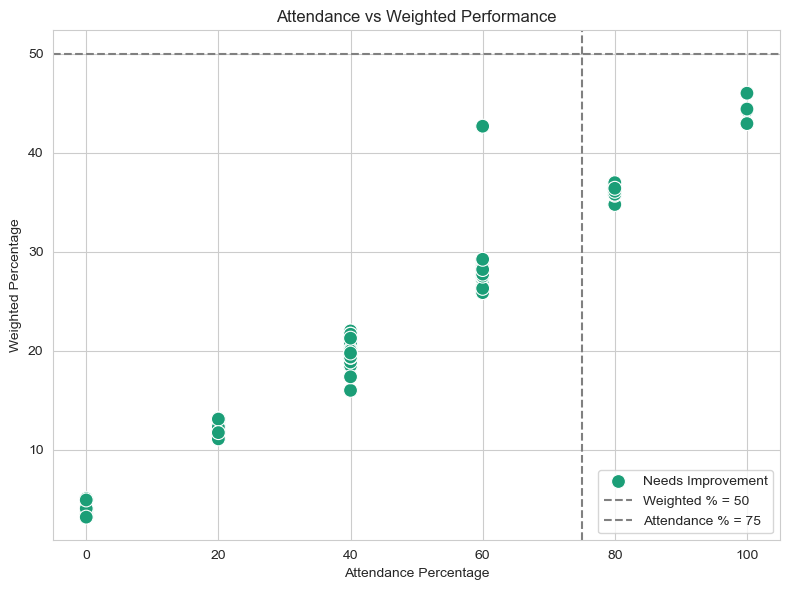

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='Attendance %', y='Weighted %', hue='Performance Category', palette='Dark2', s=100)
plt.title('Attendance vs Weighted Performance')
plt.xlabel('Attendance Percentage')
plt.ylabel('Weighted Percentage')
plt.axhline(50, color='gray', linestyle='--', label='Weighted % = 50')
plt.axvline(75, color='gray', linestyle='--', label='Attendance % = 75')
plt.legend()
plt.tight_layout()
plt.show()